# Numerai Prediction with Deep Learning - Model A

Solution : All features standardized by era before train the model. 

## Import relevant Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.pyplot as plt
import random
from numpy.random import seed
from sklearn.preprocessing import StandardScaler

## Load data

In [2]:
train_data = pd.read_csv('/Users/vitawat/Documents/Python/Numerai/numerai_training_data.csv')
tournament_data = pd.read_csv('/Users/vitawat/Documents/Python/Numerai/numerai_tournament_data.csv')
validation_data = tournament_data[tournament_data['data_type'] == 'validation' ]

## Preprocessing data

In [3]:
train_data['target_label'] = train_data['target_kazutsugi'].map({0.00:0, 0.25:1, 0.5:2, 0.75:3, 1.00:4})
validation_data['target_label'] = validation_data['target_kazutsugi'].map({0.00:0, 0.25:1, 0.5:2, 0.75:3, 1.00:4})

/Users/vitawat/anaconda2/envs/py3-TF2.0/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### a) Standardize by era

In [4]:
def scaled_by_era (data) :
    scaler = StandardScaler()
    s_data = pd.DataFrame(columns = data.columns.values[3:313])
    s_data['id'] = [] 
    for era in data['era'].unique() :
        scaled = pd.DataFrame(scaler.fit_transform(data.loc[data['era'] == era].iloc[:, 3:313]),
                          columns = data.columns.values[3:313])
        scaled['id'] = data.loc[data['era'] == era].iloc[:,0].reset_index(drop = True)
        s_data = s_data.append(scaled)

    s_data = s_data.reset_index(drop = True)
    scaled_data = pd.merge(data.iloc[:,0:3],s_data, on = 'id')
    scaled_data['target_kazutsugi'] = data['target_kazutsugi']
    scaled_data['target_label'] = data['target_label']
    return scaled_data

In [5]:
train_data_scaled_by_era = scaled_by_era(train_data)
train_data_scaled_by_era 

,id,era,data_type,feature_intelligence1,feature_intelligence2,feature_intelligence3,feature_intelligence4,feature_intelligence5,feature_intelligence6,feature_intelligence7,...,feature_wisdom39,feature_wisdom40,feature_wisdom41,feature_wisdom42,feature_wisdom43,feature_wisdom44,feature_wisdom45,feature_wisdom46,target_kazutsugi,target_label
0,n000315175b67977,era1,train,-1.413920,0.000000,-0.706960,-1.413920,0.000000,-0.706960,-0.706960,...,1.419826,0.729893,0.000000,0.717307,0.000000,1.459785,0.000000,0.708284,0.75,3
1,n0014af834a96cdd,era1,train,-1.413920,-1.413920,-1.413920,-0.706960,0.000000,-1.413920,-1.413920,...,1.419826,-1.459785,-1.456887,0.717307,-0.708432,-1.459785,-0.715019,1.416569,0.25,1
2,n001c93979ac41d4,era1,train,-0.706960,0.000000,-0.706960,-0.706960,1.413920,0.706960,0.706960,...,0.000000,-1.459785,-1.456887,0.000000,1.416864,-1.459785,-0.715019,0.708284,0.00,0
3,n0034e4143f22a13,era1,train,1.413920,-1.413920,-1.413920,0.000000,0.000000,-0.706960,-0.706960,...,1.419826,0.729893,0.728444,1.434615,1.416864,0.729893,1.430039,1.416569,0.00,0
4,n00679d1a636062f,era1,train,-0.706960,-0.706960,-0.706960,-0.706960,-1.413920,-0.706960,0.000000,...,0.709913,-0.729893,0.000000,0.717307,-1.416864,0.000000,-0.715019,0.708284,0.75,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501803,nff6a8a8feaeeb52,era120,train,0.000000,0.000000,-0.706951,-1.413902,-1.413902,0.000000,0.706951,...,0.000000,0.710090,0.000000,0.000000,0.708045,-0.710090,-0.719272,-0.706951,0.25,1
501804,nff6af62a0996372,era120,train,1.413902,-1.413902,-1.413902,1.413902,0.000000,0.706951,0.706951,...,1.414526,1.420180,1.415463,1.415307,-1.416090,0.710090,1.438543,1.413902,1.00,4
501805,nff9288983b8c040,era120,train,0.706951,0.000000,0.000000,0.000000,-0.706951,0.000000,-0.706951,...,0.707263,-0.710090,1.415463,1.415307,1.416090,-0.710090,-1.438543,-1.413902,0.00,0
501806,nffaab4e1cacc4b1,era120,train,-0.706951,-0.706951,-0.706951,0.000000,-1.413902,1.413902,1.413902,...,0.707263,0.710090,0.707732,0.707654,0.000000,0.000000,-0.719272,0.706951,0.25,1


In [6]:
validation_data_scaled_by_era = scaled_by_era(validation_data)
validation_data_scaled_by_era

,id,era,data_type,feature_intelligence1,feature_intelligence2,feature_intelligence3,feature_intelligence4,feature_intelligence5,feature_intelligence6,feature_intelligence7,...,feature_wisdom39,feature_wisdom40,feature_wisdom41,feature_wisdom42,feature_wisdom43,feature_wisdom44,feature_wisdom45,feature_wisdom46,target_kazutsugi,target_label
0,n0003aa52cab36c2,era121,validation,-0.707029,0.707029,0.000000,0.000000,-1.414059,0.707029,0.000000,...,0.707493,1.424215,0.708892,0.000000,0.000000,1.424215,-1.443389,-1.414678,0.00,0
1,n000920ed083903f,era121,validation,0.707029,0.000000,0.707029,1.414059,0.000000,-1.414059,-1.414059,...,0.000309,0.712107,1.417783,0.707804,0.000000,0.000000,0.000000,0.000000,0.25,1
2,n0038e640522c4a6,era121,validation,1.414059,-1.414059,-1.414059,1.414059,1.414059,1.414059,1.414059,...,-1.414059,0.000000,-0.708892,-1.415607,-1.415607,0.000000,0.000000,-1.414678,1.00,4
3,n004ac94a87dc54b,era121,validation,0.707029,1.414059,1.414059,0.000000,-1.414059,-1.414059,-1.414059,...,-1.414059,-1.424215,-0.708892,-1.415607,-1.415607,-1.424215,-0.721694,-0.707339,0.75,3
4,n0052fe97ea0c05f,era121,validation,-0.707029,0.000000,0.000000,-0.707029,1.414059,0.000000,0.000000,...,0.707493,-1.424215,-1.417783,0.707804,1.415607,-1.424215,-0.721694,1.414678,1.00,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56256,nffded7a83700b50,era132,validation,1.413920,-1.413920,-0.706960,-1.413920,-1.413920,1.413920,1.413920,...,-0.707254,0.000000,0.000000,-1.414508,1.415243,1.414655,-1.436323,0.707254,0.50,2
56257,nfff0003d3b2d1bb,era132,validation,1.413920,-0.706960,-0.706960,1.413920,-1.413920,1.413920,1.413920,...,-0.707254,0.000000,1.414655,-0.707254,0.707769,0.000000,-1.436323,-1.414508,1.00,4
56258,nfff7e9ae72371ed,era132,validation,1.413920,-1.413920,-1.413920,1.413920,-1.413920,0.706960,0.706960,...,-1.414508,-1.414655,-1.414655,-0.707254,-1.414655,-1.414655,-1.436323,-1.414508,0.75,3
56259,nfff86fd0988b9b5,era132,validation,0.000000,0.000000,0.000000,-0.706960,0.000000,0.000000,0.000000,...,-0.707254,1.414655,0.707327,0.707254,0.707769,0.707327,-1.436323,-1.414508,0.50,2


In [7]:
tournament_data_scaled_by_era = scaled_by_era(tournament_data)
tournament_data_scaled_by_era

,id,era,data_type,feature_intelligence1,feature_intelligence2,feature_intelligence3,feature_intelligence4,feature_intelligence5,feature_intelligence6,feature_intelligence7,...,feature_wisdom39,feature_wisdom40,feature_wisdom41,feature_wisdom42,feature_wisdom43,feature_wisdom44,feature_wisdom45,feature_wisdom46,target_kazutsugi,target_label
0,n0003aa52cab36c2,era121,validation,-0.707029,0.707029,0.000000,0.000000,-1.414059,0.707029,0.000000,...,0.707493,1.424215,0.708892,0.000000,0.000000,1.424215,-1.443389,-1.414678,0.00,NaN
1,n000920ed083903f,era121,validation,0.707029,0.000000,0.707029,1.414059,0.000000,-1.414059,-1.414059,...,0.000309,0.712107,1.417783,0.707804,0.000000,0.000000,0.000000,0.000000,0.25,NaN
2,n0038e640522c4a6,era121,validation,1.414059,-1.414059,-1.414059,1.414059,1.414059,1.414059,1.414059,...,-1.414059,0.000000,-0.708892,-1.415607,-1.415607,0.000000,0.000000,-1.414678,1.00,NaN
3,n004ac94a87dc54b,era121,validation,0.707029,1.414059,1.414059,0.000000,-1.414059,-1.414059,-1.414059,...,-1.414059,-1.424215,-0.708892,-1.415607,-1.415607,-1.424215,-0.721694,-0.707339,0.75,NaN
4,n0052fe97ea0c05f,era121,validation,-0.707029,0.000000,0.000000,-0.707029,1.414059,0.000000,0.000000,...,0.707493,-1.424215,-1.417783,0.707804,1.415607,-1.424215,-0.721694,1.414678,1.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670855,nffe0a713bb4166c,eraX,live,-0.707038,0.000000,0.000000,-0.707038,0.707038,-1.414077,-1.414077,...,1.417371,0.708341,1.416820,1.417371,1.416682,0.708341,0.000000,1.415309,NaN,NaN
1670856,nffe33c10f6c8052,eraX,live,0.000000,0.707038,0.707038,0.000000,0.707038,0.707038,0.707038,...,0.708686,0.000000,0.708410,0.708686,-0.707930,0.000000,0.743536,0.707791,NaN,NaN
1670857,nffe9533878bc94c,eraX,live,0.000000,1.414077,1.414077,-0.707038,0.000000,-1.414077,-0.707038,...,0.708686,0.000000,0.000000,0.000000,1.416682,0.708341,1.487072,0.707791,NaN,NaN
1670858,nfff05d2a4d8caf7,eraX,live,-0.707038,-0.707038,0.000000,0.000000,-0.707038,-0.707038,-0.707038,...,1.417371,1.416683,1.416820,1.417371,-0.707930,1.416683,1.487072,1.415309,NaN,NaN


### b) Inputs data and targets data

In [8]:

train_targets, train_inputs = np.array(train_data_scaled_by_era['target_label']),np.array(train_data_scaled_by_era.iloc[:,3:313])
validation_targets, validation_inputs = np.array(validation_data_scaled_by_era['target_label']), np.array(validation_data_scaled_by_era.iloc[:,3:313])
tournament_targets, tournament_inputs = np.array(tournament_data_scaled_by_era['target_label']),np.array(tournament_data_scaled_by_era.iloc[:,3:313])


## Model

In [9]:
# need to run with the same results, set seed
seed(1)
tf.random.set_seed(1)

input_size = 310
output_size = 5
hidden_layer_size = 400
NUM_EPOCHS = 250
BATCH_SIZE = 64
early_stopping = tf.keras.callbacks.EarlyStopping(patience = 2)

model = tf.keras.Sequential([
                            tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
                            tf.keras.layers.Dense(output_size,activation='softmax')
                            ])

optimizer = tf.keras.optimizers.SGD(lr = 0.0005)
model.compile(optimizer = optimizer ,loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_inputs,train_targets,
          batch_size = BATCH_SIZE,
          epochs = NUM_EPOCHS,
          callbacks = [early_stopping],
          validation_data = (validation_inputs, validation_targets),
          verbose = 2)

Train on 501808 samples, validate on 56261 samples
Epoch 1/250
501808/501808 - 27s - loss: 1.6769 - accuracy: 0.2270 - val_loss: 1.6307 - val_accuracy: 0.2373
Epoch 2/250
501808/501808 - 25s - loss: 1.6235 - accuracy: 0.2391 - val_loss: 1.6114 - val_accuracy: 0.2424
Epoch 3/250
501808/501808 - 28s - loss: 1.6097 - accuracy: 0.2433 - val_loss: 1.6022 - val_accuracy: 0.2435
Epoch 4/250
501808/501808 - 28s - loss: 1.6019 - accuracy: 0.2457 - val_loss: 1.5968 - val_accuracy: 0.2470
Epoch 5/250
501808/501808 - 29s - loss: 1.5964 - accuracy: 0.2480 - val_loss: 1.5925 - val_accuracy: 0.2490
Epoch 6/250
501808/501808 - 30s - loss: 1.5923 - accuracy: 0.2499 - val_loss: 1.5896 - val_accuracy: 0.2495
Epoch 7/250
501808/501808 - 29s - loss: 1.5890 - accuracy: 0.2514 - val_loss: 1.5872 - val_accuracy: 0.2507
Epoch 8/250
501808/501808 - 29s - loss: 1.5863 - accuracy: 0.2530 - val_loss: 1.5852 - val_accuracy: 0.2524
Epoch 9/250
501808/501808 - 32s - loss: 1.5841 - accuracy: 0.2538 - val_loss: 1.5836 

### Numerai score on train data 

In [10]:
def numerai_score(y_true, y_pred):
    rank_pred = y_pred.rank(pct = True, method = "first")
    return np.corrcoef(y_true, rank_pred)[0,1]

In [11]:
pred = model.predict(train_inputs)

train_data_pred = train_data.copy()
train_data_pred['prob 00'] =  pred[:,0]
train_data_pred['prob 25'] =  pred[:,1]
train_data_pred['prob 50'] =  pred[:,2]
train_data_pred['prob 75'] =  pred[:,3]
train_data_pred['prob 100'] =  pred[:,4]

train_data_pred['predicted'] = (train_data_pred['prob 00']*0 + 
                               train_data_pred['prob 25']*0.25 +
                               train_data_pred['prob 50']*0.50 +
                               train_data_pred['prob 75']*0.75 +
                               train_data_pred['prob 100']*1.00)

print ('numerai score on train data : ' ,
       round(numerai_score(train_data_pred['target_kazutsugi'], train_data_pred['predicted']),5))

numerai score on train data :  0.07216


### Numerai score on validation data

In [12]:
pred = model.predict(validation_inputs)

validation_data_pred = validation_data.copy()
validation_data_pred['prob 00'] =  pred[:,0]
validation_data_pred['prob 25'] =  pred[:,1]
validation_data_pred['prob 50'] =  pred[:,2]
validation_data_pred['prob 75'] =  pred[:,3]
validation_data_pred['prob 100'] =  pred[:,4]

validation_data_pred['predicted'] = (validation_data_pred['prob 00']*0 + 
                               validation_data_pred['prob 25']*0.25 +
                               validation_data_pred['prob 50']*0.50 +
                               validation_data_pred['prob 75']*0.75 +
                               validation_data_pred['prob 100']*1.00)

print ('numerai score on validation data : ' ,
       round(numerai_score(validation_data_pred['target_kazutsugi'], validation_data_pred['predicted']),5))

numerai score on validation data :  0.03124


### Correlation and consistency on validation data

In [13]:
consistant = 0
corr = []
era = []
for i in validation_data_pred['era'].unique() :
    data = validation_data_pred[validation_data_pred['era'] == i]
    score = round(numerai_score(data['target_kazutsugi'],data['predicted']),5)
    if score > 0 :
        consistant = consistant + 1
    else :
        consistant = consistant  
    
    era.append(i)
    corr.append(score)
    
correlation_table = pd.DataFrame(data = [corr], columns = era)
mean = correlation_table.mean(axis = 1)
sd = correlation_table.std(axis = 1)
correlation_table['Mean'] = mean
correlation_table['SD'] = sd


## Result

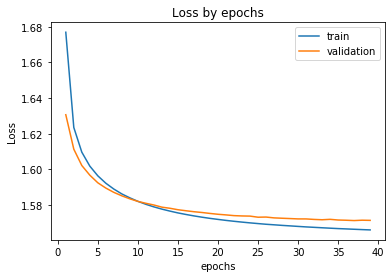

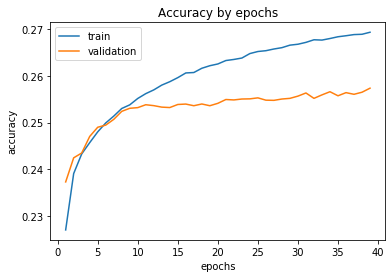

numerai score on train data :  0.07216
numerai score on validation data :  0.03124
Consistant :  1.0


,era121,era122,era123,era124,era125,era126,era127,era128,era129,era130,era131,era132
0,0.02629,0.01829,0.01904,0.04909,0.02344,0.03444,0.00359,0.05863,0.01321,0.02476,0.04382,0.05952


In [14]:
loss = model.history.history['loss']
accuracy = model.history.history['accuracy']
val_loss = model.history.history['val_loss']
val_accuracy = model.history.history['val_accuracy']
plt.plot(range(1,len(loss)+1), loss, label = 'train')
plt.plot(range(1,len(loss)+1), val_loss, label = 'validation')
plt.title('Loss by epochs')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.plot(range(1,len(loss)+1), accuracy, label = 'train')
plt.plot(range(1,len(loss)+1), val_accuracy, label = 'validation')
plt.title('Accuracy by epochs')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

print ('numerai score on train data : ' ,
       round(numerai_score(train_data_pred['target_kazutsugi'], train_data_pred['predicted']),5))

print ('numerai score on validation data : ' ,
       round(numerai_score(validation_data_pred['target_kazutsugi'], validation_data_pred['predicted']),5))

print ('Consistant : ', round(consistant/12,5))
print ('Summary on validation data by era')

correlation_table 

## Save Selected Model

In [43]:
model.save('model_A')      # Now model saved in the name of model_A

INFO:tensorflow:Assets written to: model_A/assets


## Finish model building........and start to predict with tournament data

## Predicting

#### 1) Import relevant libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.pyplot as plt
import random
from numpy.random import seed
from sklearn.preprocessing import StandardScaler

#### 2) Load tournament data

In [2]:
tournament_data = pd.read_csv('/Users/vitawat/Documents/Python/Numerai/numerai_tournament_data.csv')

#### 3} Preprocessing - label and standardize by era

In [3]:
tournament_data['target_label'] = np.nan

def scaled_by_era (data) :
    scaler = StandardScaler()
    s_data = pd.DataFrame(columns = data.columns.values[3:313])
    s_data['id'] = [] 
    for era in data['era'].unique() :
        scaled = pd.DataFrame(scaler.fit_transform(data.loc[data['era'] == era].iloc[:, 3:313]),
                          columns = data.columns.values[3:313])
        scaled['id'] = data.loc[data['era'] == era].iloc[:,0].reset_index(drop = True)
        s_data = s_data.append(scaled)

    s_data = s_data.reset_index(drop = True)
    scaled_data = pd.merge(data.iloc[:,0:3],s_data, on = 'id')
    scaled_data['target_kazutsugi'] = data['target_kazutsugi']
    scaled_data['target_label'] = data['target_label']
    return scaled_data

tournament_data_scaled_by_era = scaled_by_era(tournament_data)
tournament_data_scaled_by_era

,id,era,data_type,feature_intelligence1,feature_intelligence2,feature_intelligence3,feature_intelligence4,feature_intelligence5,feature_intelligence6,feature_intelligence7,...,feature_wisdom39,feature_wisdom40,feature_wisdom41,feature_wisdom42,feature_wisdom43,feature_wisdom44,feature_wisdom45,feature_wisdom46,target_kazutsugi,target_label
0,n0003aa52cab36c2,era121,validation,-0.707029,0.707029,0.000000,0.000000,-1.414059,0.707029,0.000000,...,0.707493,1.424215,0.708892,0.000000,0.000000,1.424215,-1.443389,-1.414678,0.00,NaN
1,n000920ed083903f,era121,validation,0.707029,0.000000,0.707029,1.414059,0.000000,-1.414059,-1.414059,...,0.000309,0.712107,1.417783,0.707804,0.000000,0.000000,0.000000,0.000000,0.25,NaN
2,n0038e640522c4a6,era121,validation,1.414059,-1.414059,-1.414059,1.414059,1.414059,1.414059,1.414059,...,-1.414059,0.000000,-0.708892,-1.415607,-1.415607,0.000000,0.000000,-1.414678,1.00,NaN
3,n004ac94a87dc54b,era121,validation,0.707029,1.414059,1.414059,0.000000,-1.414059,-1.414059,-1.414059,...,-1.414059,-1.424215,-0.708892,-1.415607,-1.415607,-1.424215,-0.721694,-0.707339,0.75,NaN
4,n0052fe97ea0c05f,era121,validation,-0.707029,0.000000,0.000000,-0.707029,1.414059,0.000000,0.000000,...,0.707493,-1.424215,-1.417783,0.707804,1.415607,-1.424215,-0.721694,1.414678,1.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676026,nffbb4995cb07742,eraX,live,-1.413803,-1.413803,-0.706765,-0.706765,-1.413803,0.707312,0.707312,...,0.000000,0.000274,0.000000,-0.708547,-1.416407,0.000274,0.000000,0.000000,NaN,NaN
1676027,nffbf96bdd6b3ee3,eraX,live,0.707312,-0.706765,-1.413803,1.414350,-0.706765,0.000273,0.000273,...,-1.417094,-1.416545,-1.417094,-1.417094,-0.708203,-1.416545,1.486708,-1.415035,NaN,NaN
1676028,nffcce807fb53a41,eraX,live,0.707312,-1.413803,-1.413803,1.414350,0.000273,-1.413803,-1.413803,...,-1.417094,-1.416545,-1.417094,-1.417094,-0.708203,-1.416545,0.000000,-1.415035,NaN,NaN
1676029,nffd0e48b79bfe80,eraX,live,0.000273,-1.413803,-1.413803,0.707312,-0.706765,-1.413803,-1.413803,...,1.417094,-1.416545,-1.417094,1.417094,1.416407,-1.416545,0.743354,1.415035,NaN,NaN


In [4]:
tournament_targets, tournament_inputs = np.array(tournament_data_scaled_by_era['target_label']),np.array(tournament_data_scaled_by_era.iloc[:,3:313])

#### 4)  Load Model

In [5]:
model_A = tf.keras.models.load_model('model_A')

#### 5) Predict

In [6]:
pred = model_A.predict(tournament_inputs)

tournament_data_pred = tournament_data.copy()
tournament_data_pred['prob 00'] =  pred[:,0]
tournament_data_pred['prob 25'] =  pred[:,1]
tournament_data_pred['prob 50'] =  pred[:,2]
tournament_data_pred['prob 75'] =  pred[:,3]
tournament_data_pred['prob 100'] =  pred[:,4]

tournament_data_pred['predicted'] = (tournament_data_pred['prob 00']*0 + 
                               tournament_data_pred['prob 25']*0.25 +
                               tournament_data_pred['prob 50']*0.50 +
                               tournament_data_pred['prob 75']*0.75 +
                               tournament_data_pred['prob 100']*1.00)


#### 6) Make submission

In [7]:
submission = pd.DataFrame(tournament_data_pred['id'])
submission['prediction_kazutsugi'] = tournament_data_pred['predicted']
submission

,id,prediction_kazutsugi
0,n0003aa52cab36c2,0.483448
1,n000920ed083903f,0.469406
2,n0038e640522c4a6,0.505309
3,n004ac94a87dc54b,0.511957
4,n0052fe97ea0c05f,0.483800
...,...,...
1676026,nffbb4995cb07742,0.477122
1676027,nffbf96bdd6b3ee3,0.533145
1676028,nffcce807fb53a41,0.450482
1676029,nffd0e48b79bfe80,0.495053


#### 7) Save submission

In [8]:
submission.to_csv('submission_model_A.csv', index = False)